<a href="https://colab.research.google.com/github/Deeksha-Analyst/-Voyage-Analytics/blob/main/colab_notebook_Voyage_Analytics_Integrating_MLOps_in_Travel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name - Voyage Analytics: Integrating MLOps for Predictive and Recommender Systems in Travel Productionization of ML Systems**

**Datasets and Objectives**

The project utilizes three key datasets: Users, Flights, and Hotels. Each dataset offers unique perspectives on travel behaviors and preferences:

**Users Dataset**: Contains user identifiers, associated companies, names, gender, and age. This data helps in understanding user demographics and segmenting the audience for personalized recommendations.

**Flights Dataset**: Includes details such as travel identifiers, user codes, flight origins and destinations, flight types, prices, durations, distances, agencies, and dates. This dataset is crucial for predicting flight prices and analyzing travel patterns.

**Hotels Dataset**: Provides information on travel identifiers, user codes, hotel names, locations, duration of stays, daily rates, total costs, and booking dates. This dataset supports the development of recommendations for hotel stays and pricing predictions.

Project Objectives

Regression Model Development: The primary goal is to build a regression model to predict flight prices based on the Flights dataset. This involves feature selection, model training, and validation to ensure accuracy and reliability. By analyzing historical flight data, the model will forecast future prices and assist travelers in making informed decisions.

REST API for Regression Model: To facilitate real-time price predictions, a REST API will be developed using Flask. This API will enable users and travel agencies to access the flight price prediction model through a web interface, offering dynamic and scalable price forecasting capabilities.

Containerization: The flight price prediction model will be packaged and deployed using Docker. This step ensures that the model is portable, consistent, and can be easily deployed across various environments without compatibility issues.

Kubernetes for Scalability: Kubernetes will be used to manage the deployment of the model, providing scalability and efficient load handling. This orchestration tool will help manage the model's availability and performance, accommodating varying user demands and system loads.

Automated Workflows with Apache Airflow: Automated workflows will be designed and implemented using Apache Airflow. Directed Acyclic Graphs (DAGs) will be created to manage data pipelines and orchestrate complex workflows, ensuring smooth and reliable operations for data processing and model updates.

CI/CD Pipeline with Jenkins: A Continuous Integration/Continuous Deployment (CI/CD) pipeline will be established using Jenkins. This pipeline will automate the deployment process, ensuring consistent and reliable updates to the model and related components, and streamlining the overall development workflow.

Technical Execution and Evaluation

The project will focus on the technical accuracy of the regression, classification, and recommendation models. Proper implementation of the REST API, Docker, Kubernetes, Apache Airflow, and Jenkins will be critical. MLFlow will be used for model tracking to monitor performance and ensure model integrity. The project will also include a Streamlit web app for user-friendly interaction with the models.

Code quality, organization, and documentation will be emphasized to ensure maintainability and clarity. A well-structured GitHub repository will be maintained, with meaningful commit messages and comprehensive README files detailing project setup, usage, and other relevant information.

**Outcome and Impact**

The successful completion of this project will provide the travel industry with advanced tools for predictive analytics and personalized recommendations. By integrating MLOps practices, the project will offer scalable, automated solutions for managing travel data and deploying machine learning models. The final deliverables will enhance decision-making for travelers and travel companies, leading to improved customer satisfaction and operational

**Capstone Project: Productionization of ML Systems**

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application

Brief overview of each datasets
Users Dataset:

code: User identifier.

company: Associated company.

name: Name of the user.

gender: Gender of the user.

age: Age of the user.

Flights Dataset:

travelCode: Identifier for the travel.

userCode: User identifier(linked to the Users dataset)

from: Origin of the flight.

to: Destination of the flight.

flightType: Type of flight (e.g., first class).

price: Price of the flight.

time: Flight duration.

distance: Distance of the flight.

agency: Flight agency.

date: Date of the flight.

Hotels Dataset:

travelCode: Identifier for the travel, similar to the Flights dataset.

userCode: User identifier(linked to the Users dataset)

name: Name of the hotel.

place: Location of the hotel.

days: Number of days of the hotel stay.

price: Price per day.

total: Total price for the stay.

date: Date of the hotel booking.

# **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
!pip install shap==0.40.0







     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp311-cp311-linux_x86_64.whl size=515305 sha256=1a32765ab94d2a1b83e487199fc20dbb25573a5f0b795ac5ef457693a2b871c9
  Stored in directory: /root/.cache/pip/wheels/ac/0e/91/2326cd1e039c5e654e588168f49ca304e9b0e57e02ff3cdddc
Successfully built shap
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.47.2
    Uninstalling shap-0.47.2:
      Successfully uninstalled shap-0.47.2


# **2. Importing Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
users = pd.read_csv("/content/drive/MyDrive/Capstone Project: Productionization of ML Systems/users.csv" ,encoding= 'unicode_escape')


In [4]:
hotels = pd.read_csv("/content/drive/MyDrive/Capstone Project: Productionization of ML Systems/hotels.csv" ,encoding= 'unicode_escape')

In [5]:
flights = pd.read_csv("/content/drive/MyDrive/Capstone Project: Productionization of ML Systems/flights.csv" ,encoding= 'unicode_escape')

In [6]:
users.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [7]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [8]:
hotels.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [9]:
users.shape

(1340, 5)

In [10]:
hotels.shape

(40552, 8)

In [11]:
flights.shape

(271888, 10)

In [12]:
flights_users = pd.merge(flights, users, left_on='userCode', right_on='code')

# Merge the result with hotels on travelCode and userCode
all_data = pd.merge(flights_users, hotels, on=['travelCode', 'userCode'])

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81104 entries, 0 to 81103
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  81104 non-null  int64  
 1   userCode    81104 non-null  int64  
 2   from        81104 non-null  object 
 3   to          81104 non-null  object 
 4   flightType  81104 non-null  object 
 5   price_x     81104 non-null  float64
 6   time        81104 non-null  float64
 7   distance    81104 non-null  float64
 8   agency      81104 non-null  object 
 9   date_x      81104 non-null  object 
 10  code        81104 non-null  int64  
 11  company     81104 non-null  object 
 12  name_x      81104 non-null  object 
 13  gender      81104 non-null  object 
 14  age         81104 non-null  int64  
 15  name_y      81104 non-null  object 
 16  place       81104 non-null  object 
 17  days        81104 non-null  int64  
 18  price_y     81104 non-null  float64
 19  total       81104 non-nul

In [14]:
all_data.head().T

,0,1,2,3,4
travelCode,0,0,2,2,7
userCode,0,0,0,0,0
from,Recife (PE),Florianopolis (SC),Aracaju (SE),Salvador (BH),Aracaju (SE)
to,Florianopolis (SC),Recife (PE),Salvador (BH),Aracaju (SE),Salvador (BH)
flightType,firstClass,firstClass,firstClass,firstClass,economic
price_x,1434.38,1292.29,1684.05,1531.92,964.83
time,1.76,1.76,2.16,2.16,2.16
distance,676.53,676.53,830.86,830.86,830.86
agency,FlyingDrops,FlyingDrops,CloudFy,CloudFy,CloudFy
date_x,09/26/2019,09/30/2019,10/10/2019,10/12/2019,11/14/2019


In [15]:
all_data.shape

(81104, 21)

In [16]:
# Dataset Duplicate Value Count
all_data.duplicated().sum()

np.int64(0)

In [17]:

# Missing Values/Null Values Count
all_data.isnull().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price_x,0
time,0
distance,0
agency,0
date_x,0


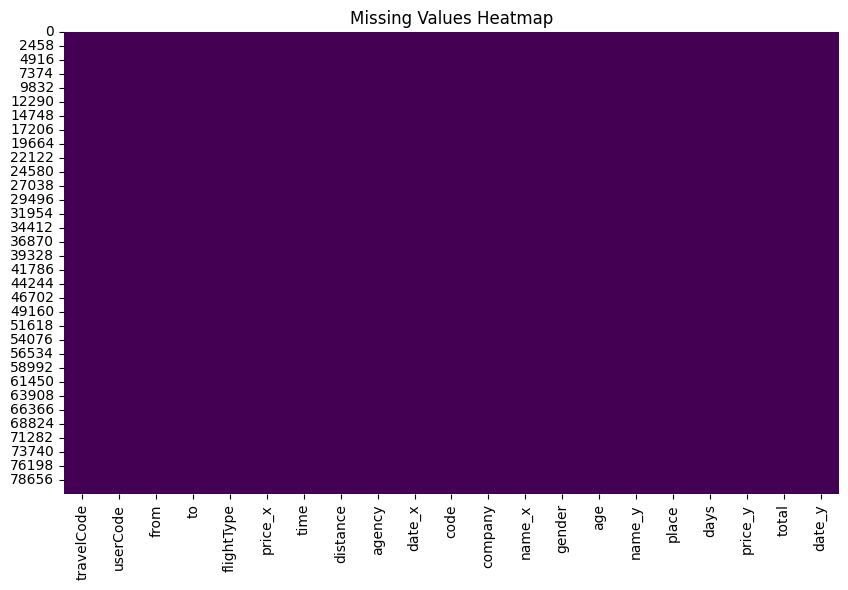

In [18]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [19]:
all_data.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price_x', 'time',
       'distance', 'agency', 'date_x', 'code', 'company', 'name_x', 'gender',
       'age', 'name_y', 'place', 'days', 'price_y', 'total', 'date_y'],
      dtype='object')

In [20]:
all_data.duplicated().sum()


np.int64(0)

 **Understanding Your Variables**

In [21]:
all_data.columns


Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price_x', 'time',
       'distance', 'agency', 'date_x', 'code', 'company', 'name_x', 'gender',
       'age', 'name_y', 'place', 'days', 'price_y', 'total', 'date_y'],
      dtype='object')

In [22]:
all_data.describe().T


,count,mean,std,min,25%,50%,75%,max
travelCode,81104.0,67911.794461,39407.956381,0.00,33696.75,67831.00,102211.25,135942.00
userCode,81104.0,666.963726,391.134383,0.00,323.00,658.00,1013.00,1339.00
price_x,81104.0,957.725281,362.212893,301.51,672.66,899.60,1222.24,1754.17
time,81104.0,1.424116,0.543071,0.44,1.04,1.46,1.76,2.44
distance,81104.0,548.097771,209.053667,168.22,401.66,562.14,676.53,937.77
code,81104.0,666.963726,391.134383,0.00,323.00,658.00,1013.00,1339.00
age,81104.0,42.790615,12.942576,21.00,32.00,42.00,54.00,65.00
days,81104.0,2.499679,1.119319,1.00,1.00,2.00,4.00,4.00
price_y,81104.0,214.439554,76.741832,60.39,165.99,242.88,263.41,313.02
total,81104.0,536.229513,319.329514,60.39,247.62,495.24,742.86,1252.08


**Check Unique Values for each variable.**


In [23]:
unique_values = all_data.nunique()

# Print the unique values
print("Unique values per column:")
print(unique_values)

Unique values per column:
travelCode    40552
userCode       1310
from              9
to                9
flightType        3
price_x         490
time             33
distance         35
agency            3
date_x          994
code           1310
company           5
name_x         1308
gender            3
age              45
name_y            9
place             9
days              4
price_y           9
total            36
date_y          199
dtype: int64


In [24]:
all_data['gender'].value_counts()

,count
gender,
female,27380
male,27170
none,26554


In [36]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
travelCode,81104.0,67911.794461,39407.956381,0.00,33696.75,67831.00,102211.25,135942.00
userCode,81104.0,666.963726,391.134383,0.00,323.00,658.00,1013.00,1339.00
price_x,81104.0,957.725281,362.212893,301.51,672.66,899.60,1222.24,1754.17
time,81104.0,1.424116,0.543071,0.44,1.04,1.46,1.76,2.44
distance,81104.0,548.097771,209.053667,168.22,401.66,562.14,676.53,937.77
code,81104.0,666.963726,391.134383,0.00,323.00,658.00,1013.00,1339.00
age,81104.0,42.790615,12.942576,21.00,32.00,42.00,54.00,65.00
days,81104.0,2.499679,1.119319,1.00,1.00,2.00,4.00,4.00
price_y,81104.0,214.439554,76.741832,60.39,165.99,242.88,263.41,313.02
total,81104.0,536.229513,319.329514,60.39,247.62,495.24,742.86,1252.08


Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

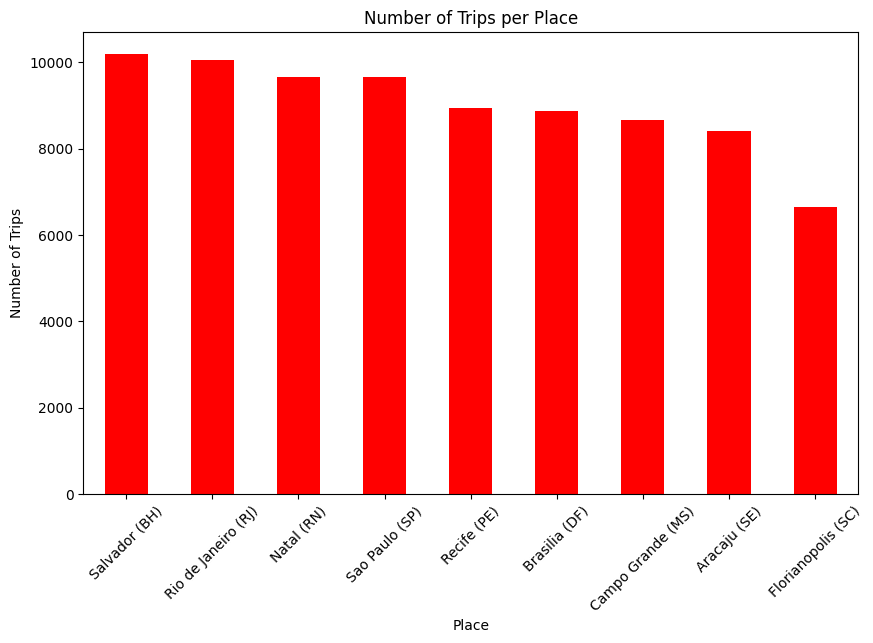

In [25]:
# Chart - 1 visualization code
# Number of trips/bookings per 'place'
place_counts = all_data['place'].value_counts()
plt.figure(figsize=(10, 6))
place_counts.plot(kind='bar', color='red')
plt.title('Number of Trips per Place')
plt.xlabel('Place')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

Chart - 2 How much a company spend on trip?

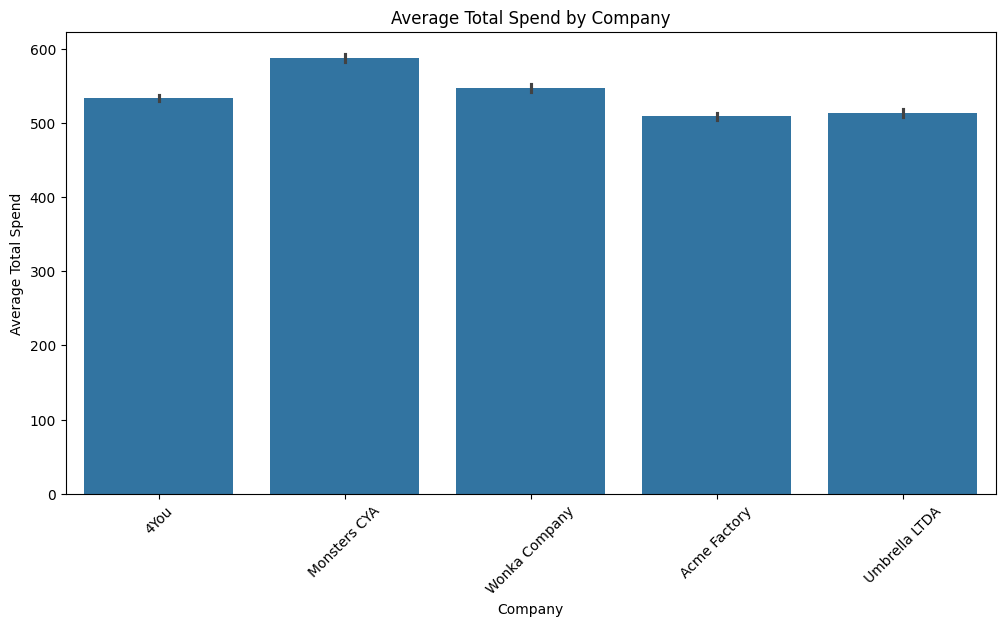

In [26]:
  # Chart - 2 visualization code
# Average 'total' by 'company'
plt.figure(figsize=(12, 6))
sns.barplot(x='company', y='total', data=all_data, estimator='mean')
plt.title('Average Total Spend by Company')
plt.xlabel('Company')
plt.ylabel('Average Total Spend')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()


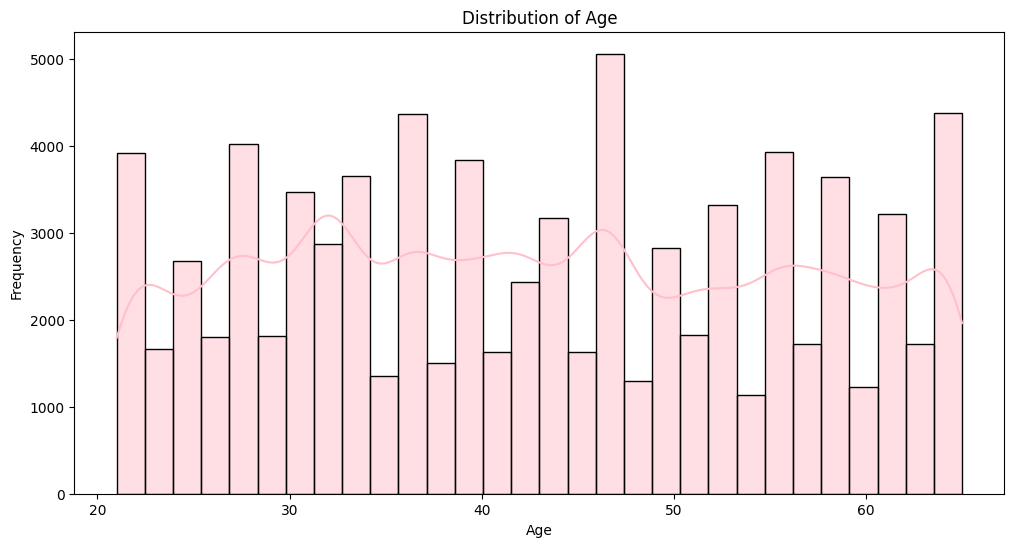

In [27]:

# Chart - 3 visualization code
# Distribution of 'age'
plt.figure(figsize=(12, 6))
sns.histplot(all_data['age'], bins=30, kde=True, color='pink')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Chart - 3 Flight price distribution by type of flight seats.


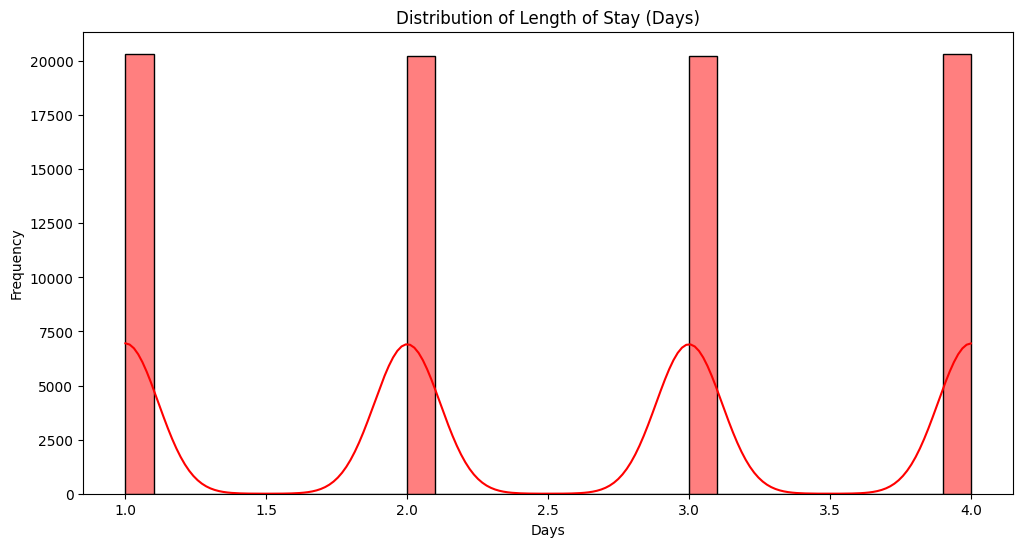

In [28]:
#Chart - 4 visualization code
# Distribution of 'days'
plt.figure(figsize=(12, 6))
sns.histplot(all_data['days'], bins=30, kde=True, color='red')
plt.title('Distribution of Length of Stay (Days)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

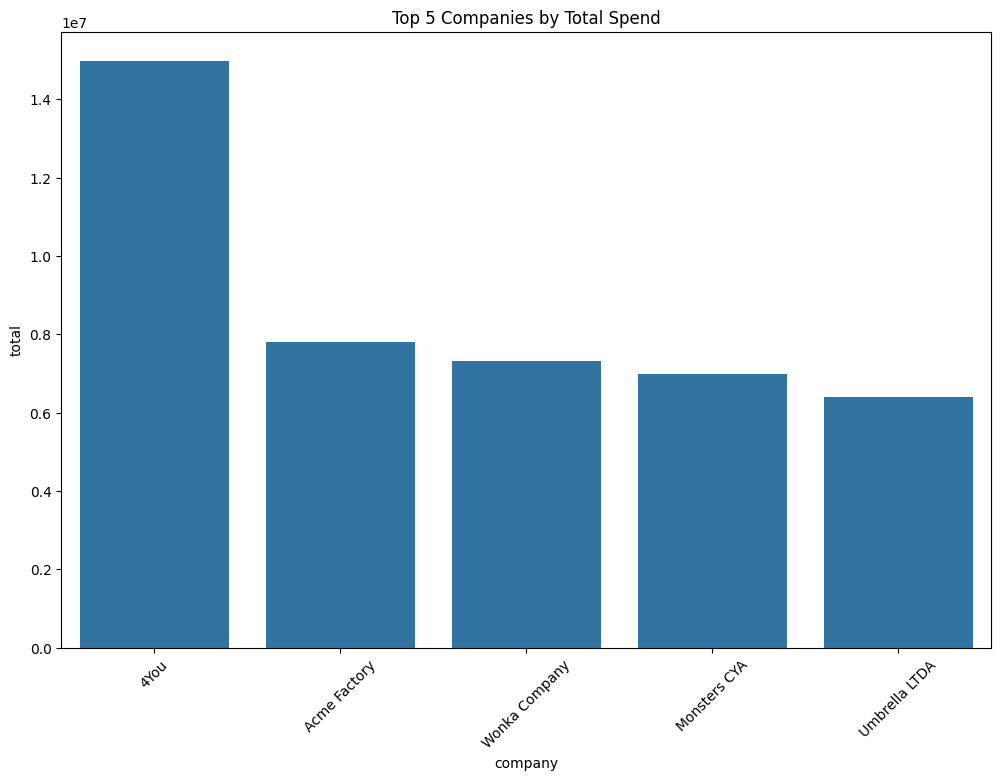

In [29]:
# Chart - 5 visualization code
# Top 5 Companies by Total Spend
top_companies = all_data.groupby('company')['total'].sum().nlargest(5).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=top_companies, x='company', y='total')
plt.title('Top 5 Companies by Total Spend')
plt.xticks(rotation=45)
plt.show()


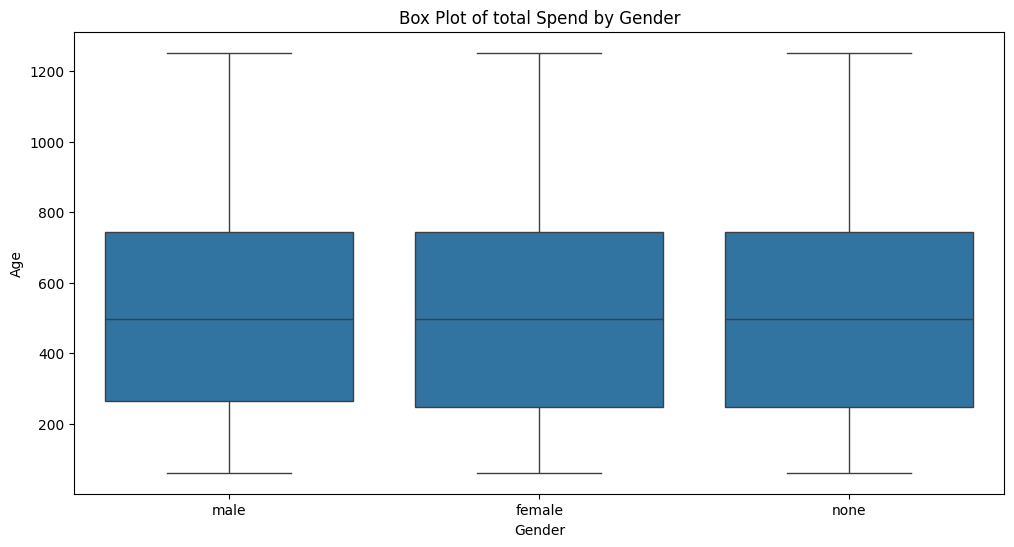

In [30]:
# Chart - 6 visualization code
# Box Plot for 'gender' across 'total' spend
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='total', data=all_data)
plt.title('Box Plot of total Spend by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


Chart - 7 How can we determine the proportion of different flight types among travelers?


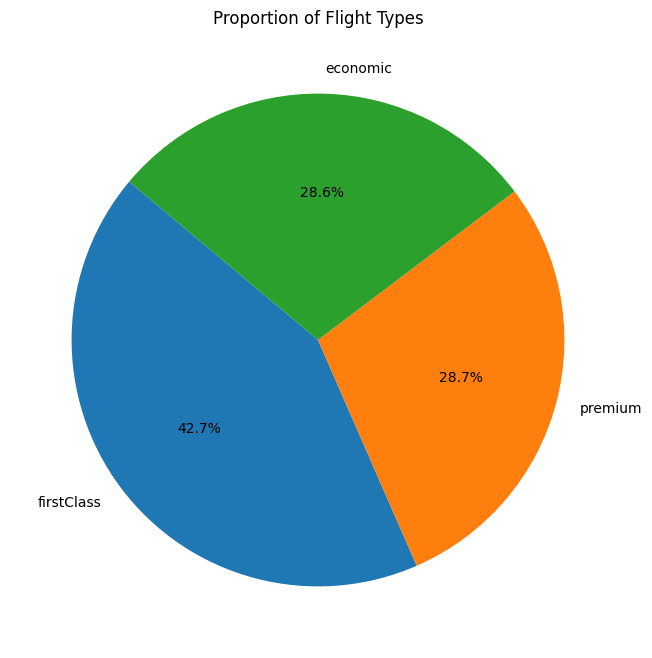

In [31]:
# Chart - 7 visualization code
# Pie Chart for 'flightType'
flight_type_counts = all_data['flightType'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(flight_type_counts, labels=flight_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Flight Types')
plt.show()


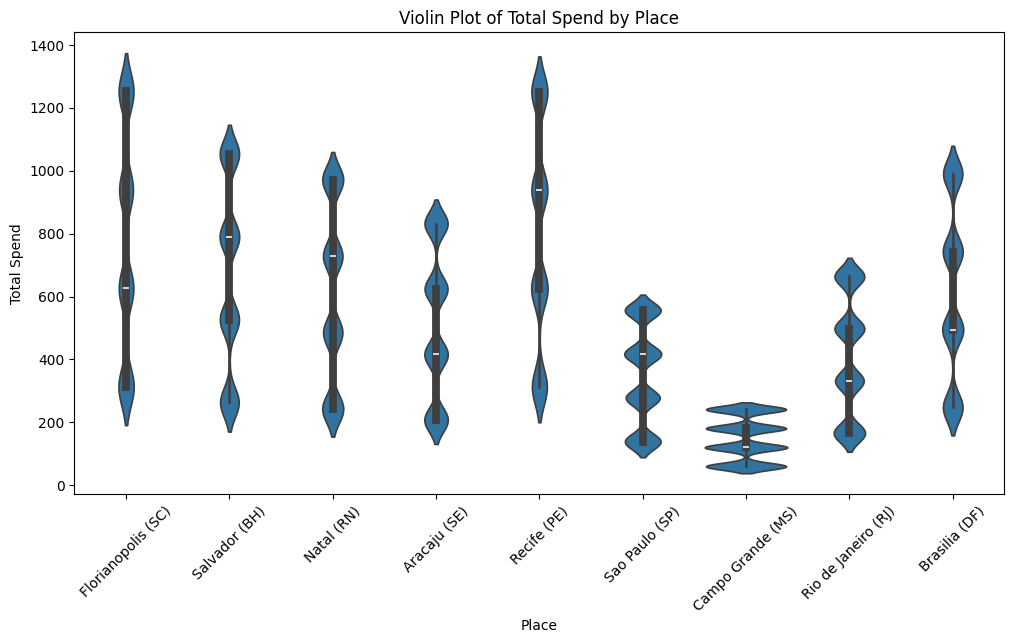

In [32]:
# Chart - 8 visualization code
# Violin Plot for 'total' across 'place'
plt.figure(figsize=(12, 6))
sns.violinplot(x='place', y='total', data=all_data)
plt.title('Violin Plot of Total Spend by Place')
plt.xlabel('Place')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()


Chart - 9 In which location do people spend the most on accommodations?

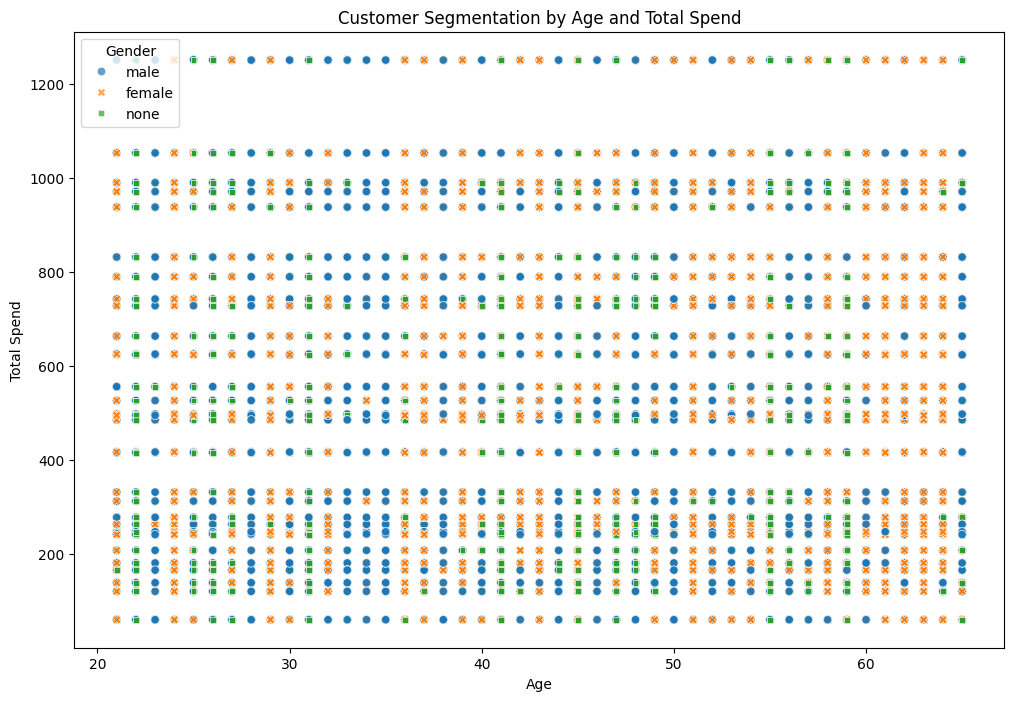

In [33]:
# Chart - 9 visualization code
# Scatter Plot for Customer Segmentation
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='total', hue='gender', style='gender', data=all_data, alpha=0.7)
plt.title('Customer Segmentation by Age and Total Spend')
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.legend(title='Gender')
plt.show()



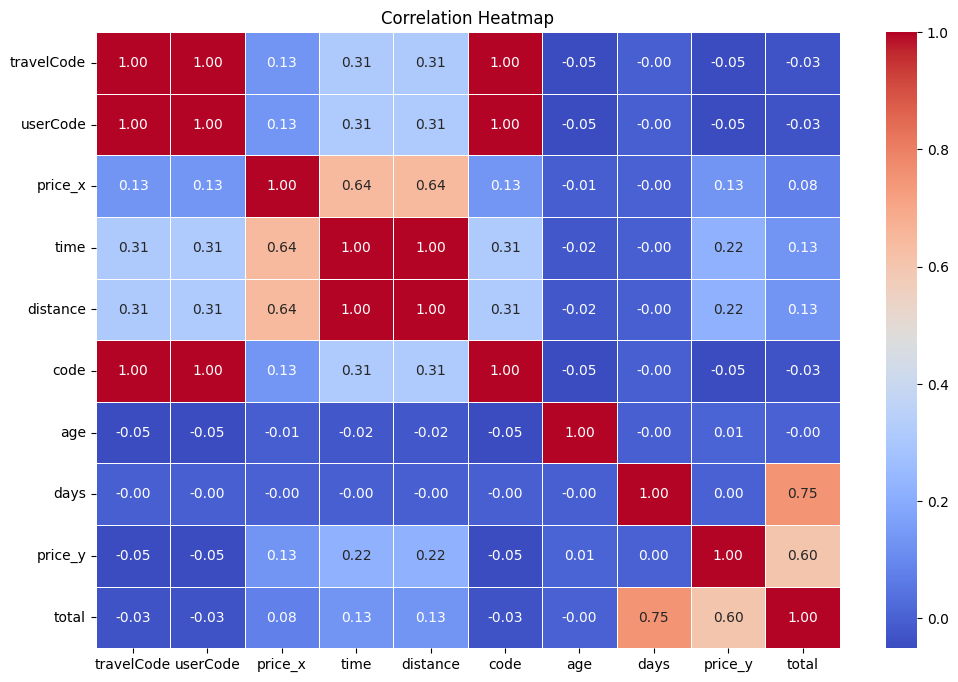

In [34]:
# Correlation Heatmap visualization code

# Select only the numerical columns for correlation calculation
numerical_data = all_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

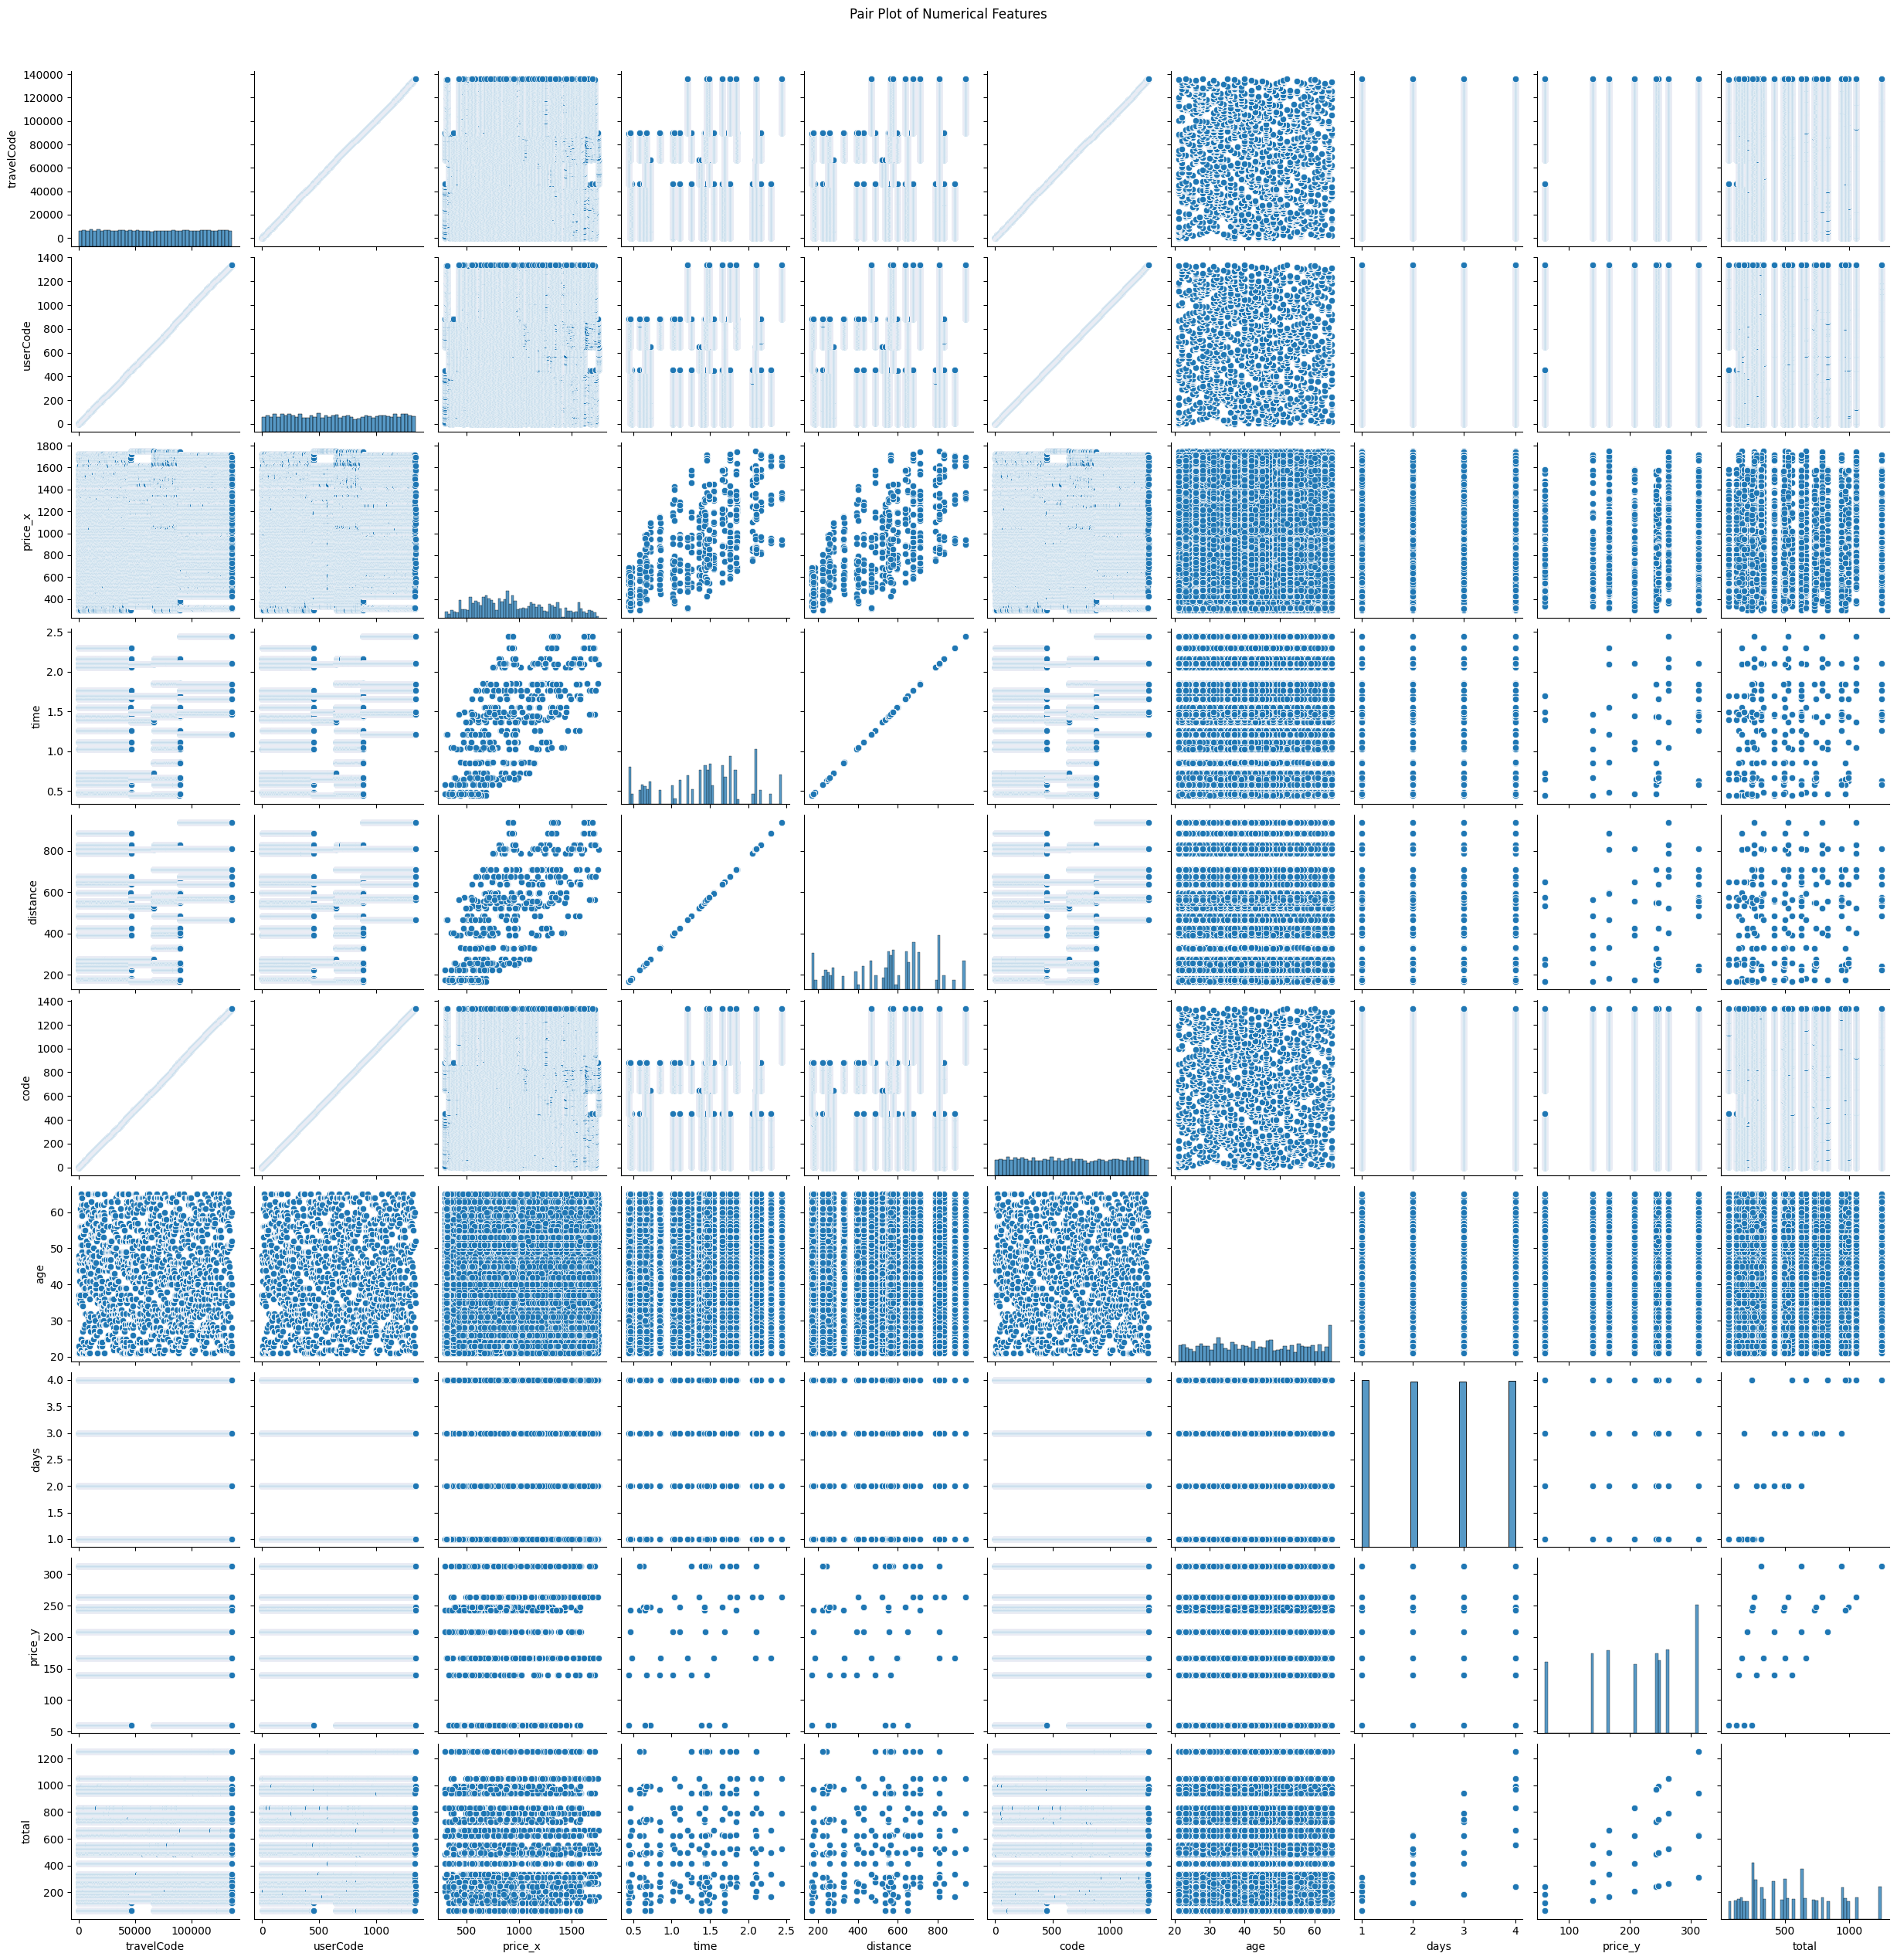

In [35]:
# Pair Plot visualization code
# Select numerical columns for the pair plot
numerical_data = all_data.select_dtypes(include=['number'])

# Create a pair plot
sns.pairplot(numerical_data)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)  # Adjust title position
plt.show()

**Users Dataset**

1 **code**

Description: Unique identifier for each user.

Data Type: Integer

Purpose: Used to reference individual users.

2 **company**

Description: The company or organization associated with the user.

Data Type: Object (String)

Purpose: To categorize users based on their company or affiliation.

3 **name**:

Description: The name of the user.

Data Type: Object (String)

Purpose: Provides user identity

4 **gender**

Description: Gender of the user.

Data Type: Object (String)

Purpose: Used for gender-based analysis or classification

5 **age**

Description: Age of the user.

Data Type: Integer

Purpose: To analyze age distribution and its impact on travel preferences.





**Flights Dataset**

**travelCode**

Description: Identifier for each travel booking or flight.

Data Type: Integer

Purpose: Unique reference for each flight or booking.

**userCode**:

Description: Identifier for the user who booked the flight.

Data Type: Integer

Purpose: Links flight data to the corresponding user.

from:

Description: Origin of the flight.

Data Type: Object (String)

Purpose: Indicates the starting location of the flight.

to:

Description: Destination of the flight.

Data Type: Object (String)

Purpose: Indicates the endpoint of the flight.

flightType:

Description: Class or type of the flight (e.g., first class, economy).

Data Type: Object (String)

Purpose: Used to categorize flights based on their class or service level.

price:

Description: Price of the flight.

Data Type: Float

Purpose: Represents the cost of the flight, useful for price prediction.

time:

Description: Duration of the flight.

Data Type: Float

Purpose: Measures the time taken for the flight, useful for analysis and recommendations.

distance:

Description: Distance covered by the flight.

Data Type: Float

Purpose: Provides information on how far the flight travels, which can influence pricing.

agency:


Description: Agency through which the flight was booked.

Data Type: Object (String)

Purpose: To analyze booking trends based on the agency.

date:

Description: Date when the flight was booked or took place.

Data Type: Object (String) or DateTime

Purpose: Useful for time-based analysis and trend detection.

**Hotels Dataset**

travelCode:

Description: Identifier for each hotel booking.

Data Type: Integer

Purpose: Unique reference for each hotel stay.

userCode:

Description: Identifier for the user who booked the hotel.

Data Type: Integer

Purpose: Links hotel booking data to the corresponding user.

name:

Description: Name of the hotel.

Data Type: Object (String)

Purpose: Provides the name of the hotel where the stay occurred.

place:

Description: Location or city where the hotel is situated.

Data Type: Object (String)

Purpose: Indicates the geographical location of the hotel.

days:

Description: Number of days the hotel was booked for.

Data Type: Integer

Purpose: Represents the duration of the hotel stay.

price:

Description: Price per day for staying at the hotel.

Data Type: Float

Purpose: Indicates the daily cost of staying at the hotel, useful for

price analysis.

total:

Description: Total price for the entire hotel stay.

Data Type: Float

Purpose: Represents the overall cost of the hotel stay, calculated as price * days.

date:

Description: Date when the hotel was booked.

Data Type: Object (String) or DateTime

Purpose: Useful for time-based analysis and trend detection.

Summary
Users Dataset: Focuses on user identification, demographic information, and affiliations.

Flights Dataset: Covers flight details including booking identifiers, pricing, duration, and booking agency.

Hotels Dataset: Includes hotel booking information such as duration, cost, and location.

These descriptions will help you understand and analyze each dataset more effectively.



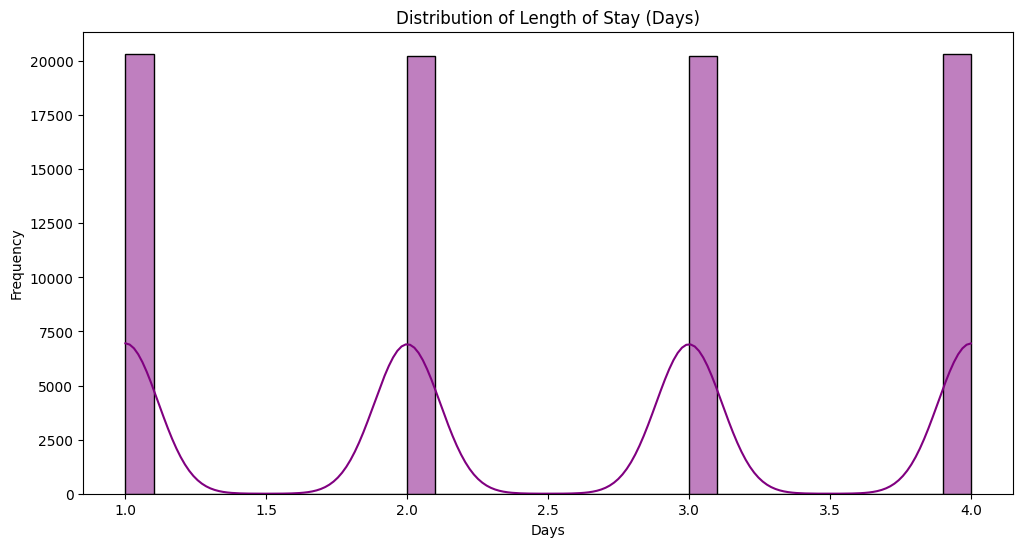

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(all_data['days'], bins=30, kde=True, color='purple')
plt.title('Distribution of Length of Stay (Days)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

1. Why did you pick the specific chart?
A bar chart showing the average total spend for each company. It visually compares average spending across different companies, helping to identify trends and make data-driven decisions.

2. What is/are the insight(s) found from the chart?
We found that Monsters CYA has the highest average total spend.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.It helps improve the customer’s trip experience.

**Potential Impact**


By incorporating both data science and MLOps principles, the project could result in:

More accurate predictions of flight and hotel prices, leading to better decision-making for travelers.

Enhanced personalized experiences for users through recommendation systems.

The ability to continually improve models by automating retraining and ensuring the models evolve with changing trends in the travel industry.